In [1]:
%matplotlib inline

In [1]:
from IPython.display import display, Markdown, Latex, HTML, IFrame
import cv2
import numpy as np
from matplotlib import pyplot as plt


## What is  convolution

Let's say you have an image of shape (512 x 512). Take a 3 x 3 matrix & paste it above 512 x 512 matrix (**i.e** image) and store each elementwise multiplication as an entry in a **NEW matrix**. Repeat this process by striding the 3 x 3 matrix to fill up the new matrix.

#### But Why should you do this ?

Well, these 3 x 3 matrices are called KERNELS, which are experts in either sharpening or smoothing the edges of an image. Sharpened edges, smoothed edges etc form important features in making a decision.

In [3]:

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/KiftWz544_8" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')
# https://www.youtube.com/watch?v=KiftWz544_8

    

/home/manohar/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## What is Pooling tho ?

Well, Image is a combination of pixels. You must have seen 720P, 480P in videos etc. They mean spatial resolution. What's spatial resolution again ? Spatial resolution is the number of pixels you use to convey the information. Instead of 720P, you can use 244P and still get the info required. So, even if you miss out few pixels, it's not a problem. Using 1 out of every 4 consecutive pixels can still retain the info. This is **Pooling**. 

In the video below, you can see that, despite cutting the image into half, both halves convey the same information, that it is a dog. Although the image is split into halves, it is split by sampling in equal intervals.

In [5]:
# https://www.youtube.com/watch?v=f1fXCRtSUWU
    
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/f1fXCRtSUWU" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

### Edge Detection

Edge, in layman terms, is when you have a change in the intensity of pixels. Any contrasting change visible is an edge.

We will learn to:

        Find Image gradients, edges of an image.
        We will see following Operators/ Kernels finding edges: Sobel, Laplacian



It calculates the Laplacian of the image given by the relation, $$ \Delta src = \frac{\partial ^2{src}}{\partial x^2} + \frac{\partial ^2{src}}{\partial y^2} $$ where each derivative is found using Sobel derivatives. If ksize = 1, then following kernel is used for filtering:

kernel = \begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{bmatrix}


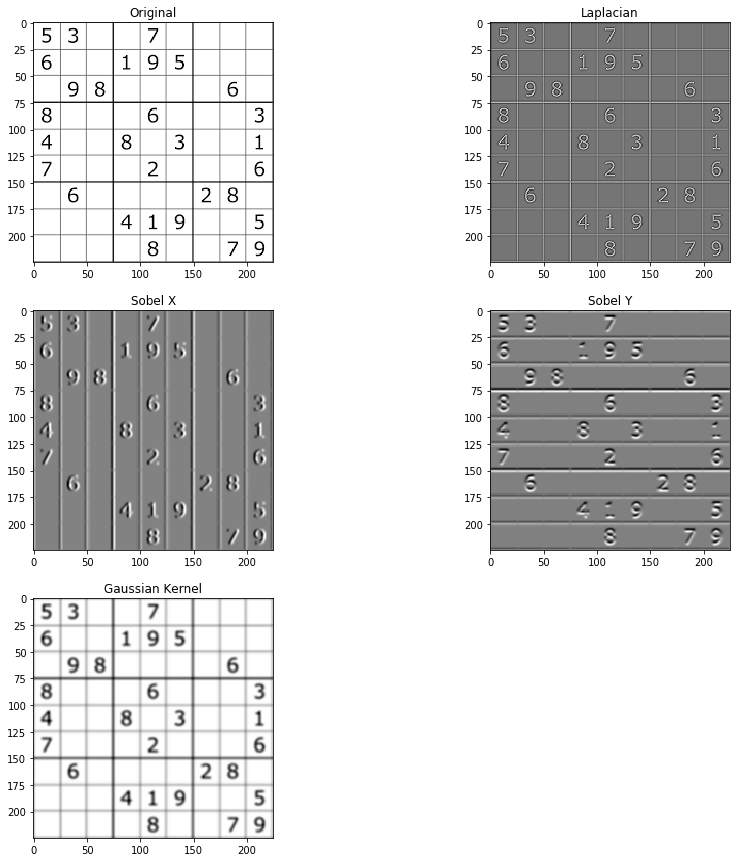

In [4]:

img = cv2.imread('images/sudoku.png',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)


fig = plt.figure(figsize=(15,15))

# Plot actual image
ax1 = fig.add_subplot(3,2,1)
ax1.title.set_text('Original')
ax1.imshow(img,cmap='gray')

# Plot laplacian image
ax2 = fig.add_subplot(3,2,2)
ax2.imshow(laplacian,cmap='gray')
ax2.title.set_text('Laplacian')

# Plot SobelX image
ax3 = fig.add_subplot(3,2,3)
ax3.imshow(sobelx,cmap='gray')
ax3.title.set_text('Sobel X')

# Plot SobelY image
ax4 = fig.add_subplot(3,2,4)
ax4.imshow(sobely,cmap='gray')
ax4.title.set_text('Sobel Y')

# Plot Gaussian image
blur = cv2.GaussianBlur(img,(5,5),0)
ax5 = fig.add_subplot(3,2,5)
ax5.imshow(blur,cmap='gray')
ax5.title.set_text('Gaussian Kernel')




plt.show()


### Can a Neural Network create its own Kernels like Gaussian, Sobel, Laplacian etc. ?

As Neural Networks (NN) are 'Universal Approximators', a pre-trained NN, must have KERNELS/OPERATORS which, when convoluted with the actual Image must reveal useful insights. These kernels will be pure random numbers in the beginning, but as the training progresses, Kernels are updated to find important features.

In [6]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

In [5]:
# load vgg model
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# summarize the model
model.summary()

Using TensorFlow backend.
W0708 12:18:47.440245 140270400227136 deprecation_wrapper.py:119] From /home/manohar/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0708 12:18:47.452822 140270400227136 deprecation_wrapper.py:119] From /home/manohar/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 12:18:47.456053 140270400227136 deprecation_wrapper.py:119] From /home/manohar/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 12:18:47.474260 140270400227136 deprecation_wrapper.py:119] From /home/manohar/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.n

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

#### Seeing what they have learnt

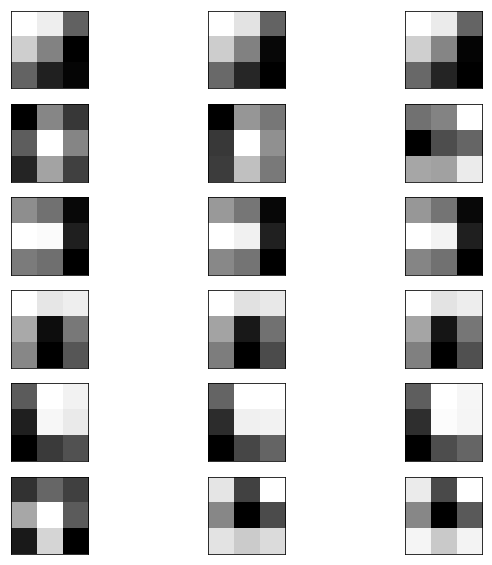

In [8]:
# load the model
model = VGG16()

# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1

fig = plt.figure(figsize=(10,10))


for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = fig.add_subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.show()

del model

## Visualizing convoluted images / Feature maps

Feature maps are the imporant features identified by each kernel from an image.
We are now going to **visualize** the **first conv layer** out of the many convolutions happening in the successive layers.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


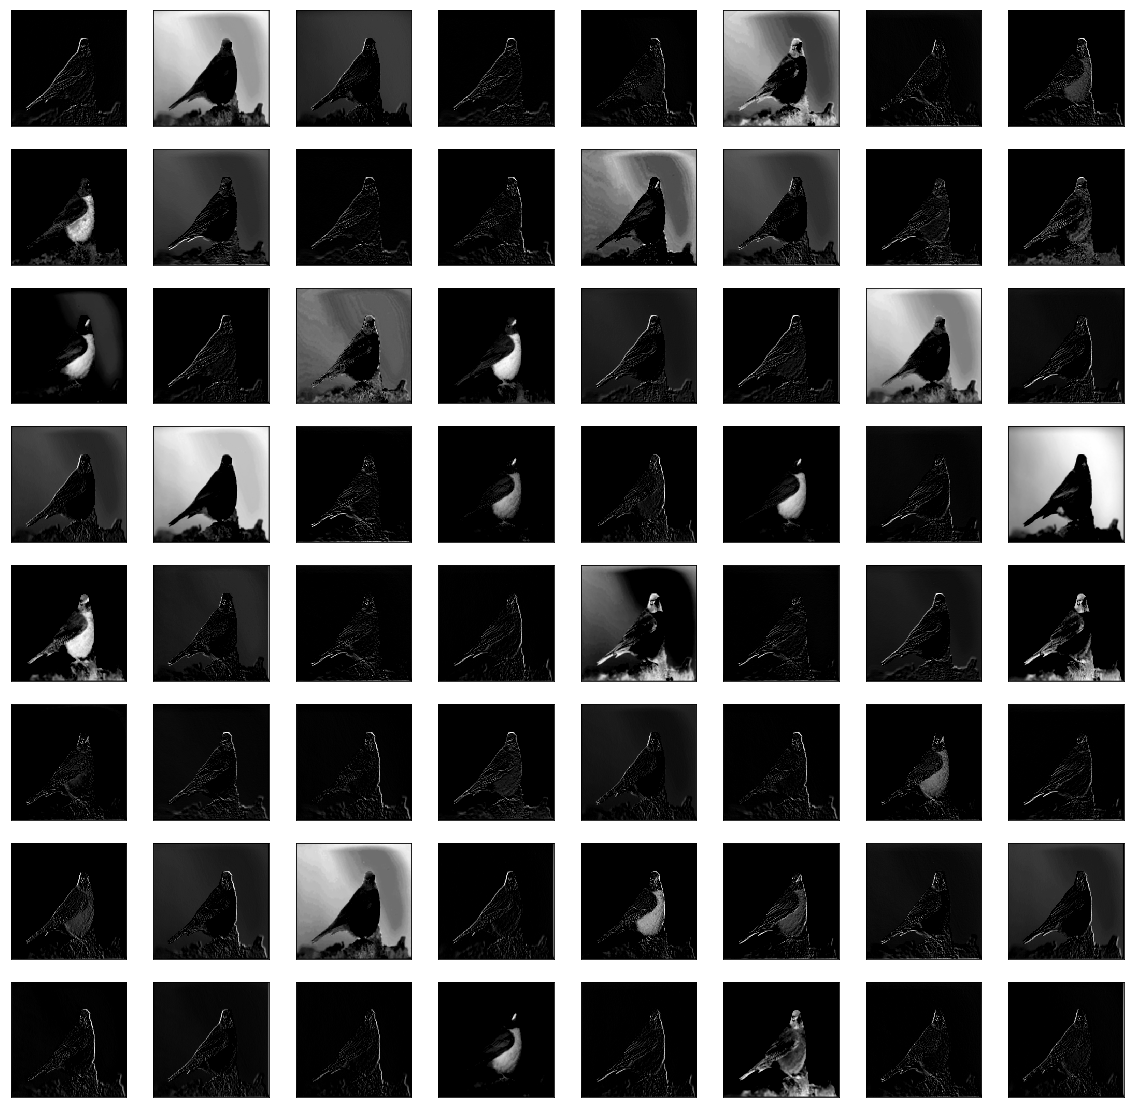

In [9]:
# load the model
model = VGG16()

# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
# load the image with the required shape
img = load_img('images/bird.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1

fig = plt.figure(figsize=(20,20))

for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = fig.add_subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()

## Visualize everything !!


<Figure size 720x720 with 0 Axes>

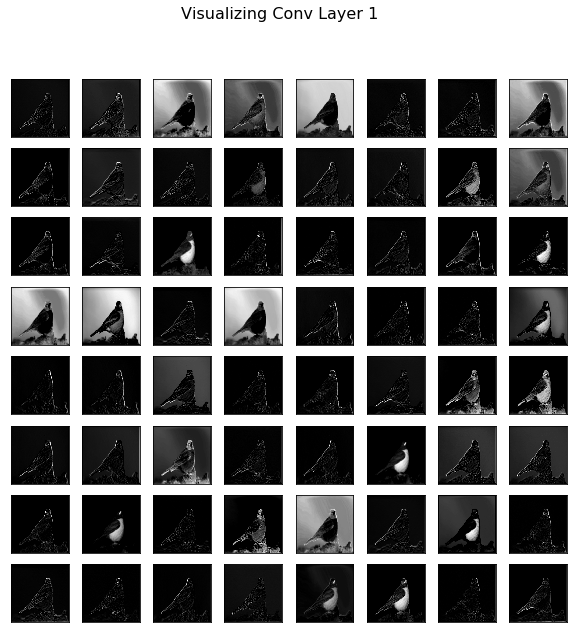

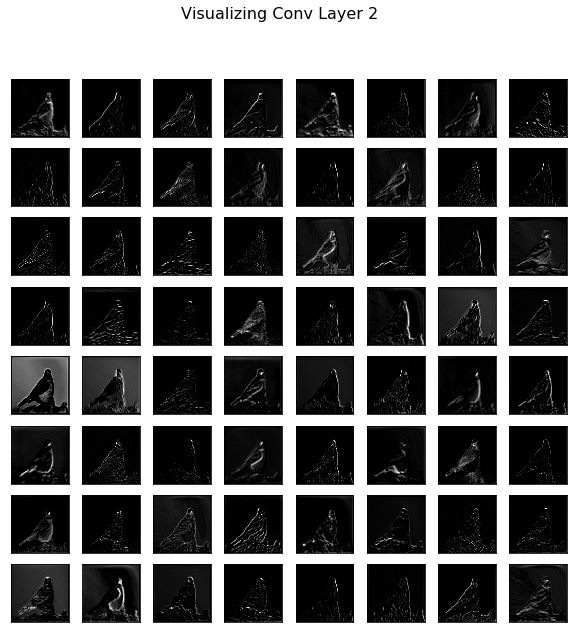

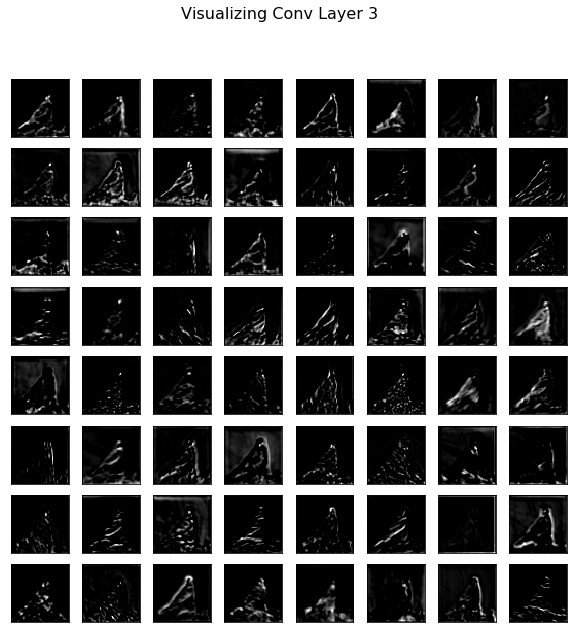

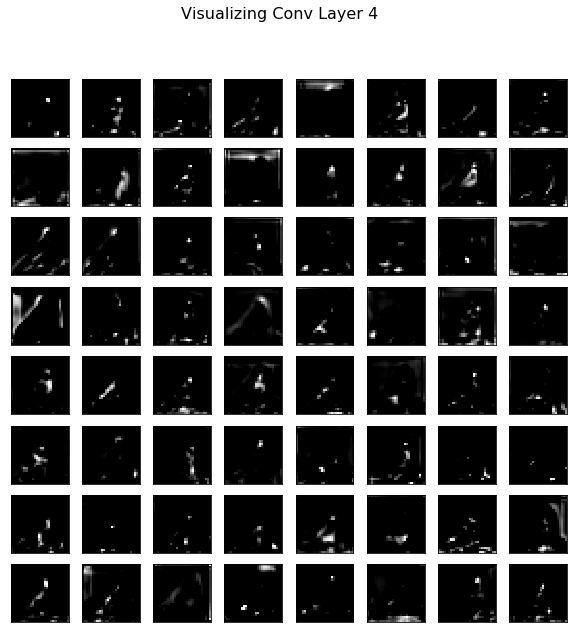

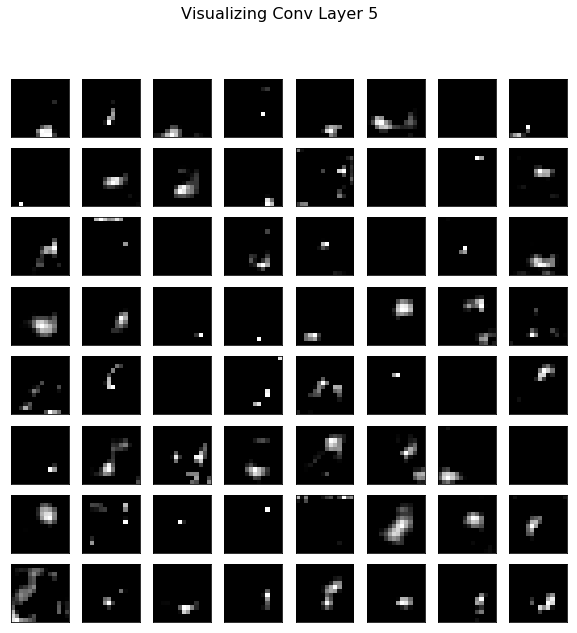

In [10]:
# load the model
model = VGG16()

# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('images/bird.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8

fig = plt.figure(figsize=(10,10))

for indeex,fmap in enumerate(feature_maps):
	# plot all 64 maps in an 8x8 squares
	ix = 1
	fig = plt.figure(figsize=(10,10))
	fig.suptitle('Visualizing Conv Layer {}'.format(indeex+1), fontsize=16)
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = fig.add_subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	plt.show()

## References

[1] https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

[2] https://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html

[3] https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_gradients/py_gradients.html